<a href="https://colab.research.google.com/github/aashish47/machine-learning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Linear Regression**

* **Objective:** Linear regression aims to find the best-fitting linear relationship between a dependent variable (Y) and one or more independent variables (X).

* **Model:** The basic linear regression model is represented as:  

  $$Y = a + bX + ε$$

  * Y: Dependent variable (target)
  * X: Independent variable(s) (features)
  * a: Intercept (the point where the line crosses the Y-axis)
  * b: Slope (the rate of change in Y for a unit change in X)
  * ε: Error term (represents the unexplained variability)

* **Goal:** The goal of linear regression is to determine the values of 'a' and 'b' that minimize the sum of squared differences between the predicted values (a + bX) and the actual data points.

* **Types:** Linear regression can be simple (with one independent variable) or multiple (with multiple independent variables).

* **Assumptions:** Linear regression assumes that the relationship between variables is linear, that the errors (ε) are normally distributed and have constant variance (homoscedasticity), and that the errors are independent.

* **Fitting the Model:** The model is fitted to the data using various techniques like the method of least squares to estimate the parameters 'a' and 'b'.

* **Evaluation:** Linear regression models are evaluated using metrics like the coefficient of determination (R-squared), mean squared error (MSE), or root mean squared error (RMSE) to assess how well the model fits the data.

* **Use Cases:** Linear regression is used in various fields for tasks such as predicting house prices, analyzing the impact of variables on an outcome, and understanding the relationships between factors.



In [24]:
import numpy as np

In [25]:
data = np.loadtxt("data.csv",delimiter=",")
x = data[:,0].reshape(-1,1)
y = data[:,1]

In [26]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)

In [27]:
from sklearn.linear_model import LinearRegression

alg1 = LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression()

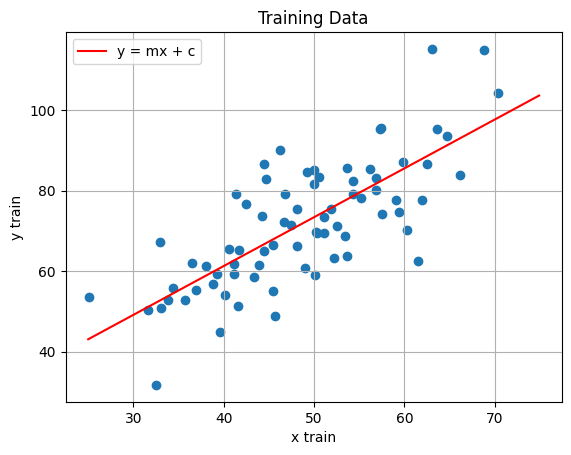

In [28]:
import matplotlib.pyplot as plt

m = alg1.coef_[0]
c = alg1.intercept_
x_line = np.arange(25, 75, 0.1)
y_line = m * x_line + c

plt.plot(x_line, y_line, "r", label="y = mx + c")
plt.scatter(x_train, y_train)
plt.xlabel("x train")
plt.ylabel("y train")
plt.title("Training Data")
plt.legend()
plt.grid()


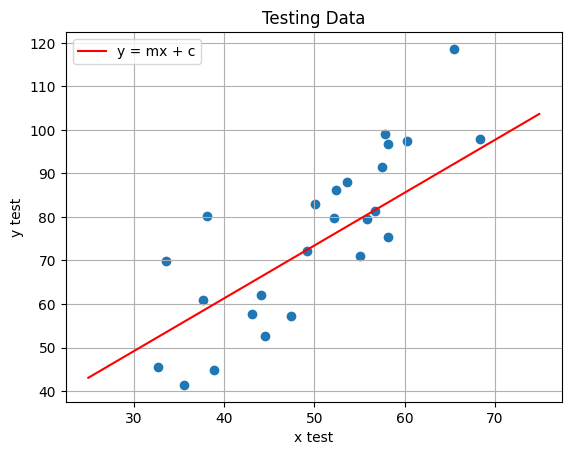

In [29]:
plt.scatter(x_test, y_test)
plt.plot(x_line, y_line, "r", label="y = mx + c")
plt.xlabel("x test")
plt.ylabel("y test")
plt.title("Testing Data")
plt.legend()
plt.grid()

# Coefficient of Determination

- **Definition:** R-squared ($R^2$) is a statistical metric used in regression analysis to assess how well a regression model fits the observed data.

- **Interpretation:** It quantifies the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. A higher $R^2$ indicates a better fit.

- **Range:** $R^2$ values range from 0 to 1, where:
   - 0 means the model does not explain any variance in the dependent variable.
   - 1 means the model perfectly explains all the variance.

- **Calculation:** $R^2$ is calculated using the formula:
   $$R^2 = 1 - \frac{SSR}{SST}$$

  - **Sum of Squared Residuals (SSR):**
    - **Definition:** SSR, also known as the sum of squared residuals, measures the total squared difference between the observed values and the values predicted by a regression model.

    - **Formula:** $$SSR = Σ(yi - ŷi)²$$
      - Where "yi" represents the observed values.
      - And "ŷi" represents the predicted values from the regression model for each data point "i."

  - **Total Sum of Squares (SST):**

    - **Definition:** SST, or the total sum of squares, quantifies the total variance in the dependent variable, assuming that the mean of the dependent variable is the best predictor.

    - **Formula:** $$SST = Σ(yi - ȳ)²$$
      - Where "yi" represents the observed values.
      - And "ȳ" represents the mean of the observed values.


- **Goodness of Fit:** $R^2$ is used to evaluate the goodness of fit of a regression model. A high $R^2$ indicates that the model accounts for a large portion of the variability in the data.

- **Limitations:** $R^2$ does not inform about the statistical significance of individual coefficients or the model's predictive power. A high $R^2$ doesn't necessarily mean a good predictive model.

- **Adjusted $R^2$:** To account for the number of independent variables and potential overfitting, the adjusted $R^2$ is used. It penalizes the inclusion of irrelevant variables.

- **Usefulness:** $R^2$ is commonly employed in fields like economics, social sciences, and natural sciences to assess the explanatory power of regression models.

- **Consideration:** $R^2$ should be used alongside other metrics and domain knowledge to make informed decisions about the suitability of a regression model for a specific problem.

- **Summary:** $R^2$ is a valuable metric for understanding the proportion of variability explained by a regression model, but it is just one part of the evaluation process when using regression analysis.



In [30]:
score_train = alg1.score(x_train, y_train)
score_test = alg1.score(x_test, y_test)
print(f"train score: {score_train}")
print(f"test score: {score_test}")

train score: 0.5722849566900504
test score: 0.6229851172116141


# Linear Regression Steps

1. **Cost Function:**
   - The cost function for linear regression is typically represented as:
     $$
     J(m, c) = \sum_{i=1}^m (y^{(i)} - (mx^{(i)} + c))^2
     $$
   - Here, $J(m, c)$ measures the cost or error of the model's predictions compared to the actual data. $m$ represents the slope of the linear regression line, and $c$ represents the intercept.

2. **Minimizing the Cost Function:**
   - The goal of linear regression is to find the values of $m$ and $c$ that minimize the cost function. This is typically achieved by minimizing the cost function with respect to $m$ and $c$ using an optimization algorithm such as gradient descent.

3. **Differentiation and Equating to Zero:**
   - To minimize the cost function, you differentiate it with respect to $m$ and $c$ separately. The derivatives with respect to $m$ and $c$ are set to zero. These equations are known as the normal equations.

4. **Solving for $m$ and $c$:**
   - By solving the normal equations, you obtain the values of $m$ and $c$ that minimize the cost function and define the best-fitting linear regression line. These equations typically take the form:
  
     \begin{align*}
     \frac{\partial J}{\partial m} &= 0 \\
     \frac{\partial J}{\partial c} &= 0
     \end{align*}
     
   - Solving this system of equations allows you to find the optimal values of $m$ and $c$ that best fit the data.
   
    $$
    m = \frac{{(x \cdot y).mean() - x.mean() \cdot y.mean()}}{{x^2.mean() - (x.mean())^2}}
    $$  
    $$
    c = y.mean() - m \cdot x.mean()
    $$


In [86]:
def fit(x, y):
  num = (x*y).mean() - x.mean()*y.mean()
  den = (x**2).mean() - x.mean()**2
  m = num/den
  c = y.mean() - m*x.mean()
  return m, c

In [87]:
def predict(m, c, x):
  return m*x + c

In [88]:
def score(y, y_pred):
  ssr = ((y - y_pred) ** 2).sum()
  sst = ((y - y.mean()) ** 2).sum()
  return 1 - ssr/sst

In [89]:
def cost(y, y_pred):
  return ((y - y_pred) ** 2).mean()

In [90]:
x_train_fit =  x_train.reshape(75)
x_test_fit = x_test.reshape(25)
m, c = fit(x_train_fit, y_train)
y_pred = predict(m, c, x_test_fit)
R = score(y_test, y_pred)
J = cost(y_test, y_pred)
print(f"m: {m} c: {c}")
print(f"sklearn m: {alg1.coef_} sklearn c: {alg1.intercept_}")
print()
print(f"y predicted: {y_pred}")
print(f"sklearn y predicted: {alg1.predict(x_test)}")
print()
print(f"test score: {R}")
print(f"sklearn test score: {alg1.score(x_test, y_test)}")
print()
print(f"cost: {J}")

m: 1.2142733983537224 c: 12.700144303088194
sklearn m: [1.2142734] sklearn c: 12.700144303088301

y predicted: [81.58248401 79.58001099 92.13311576 73.50263302 58.98803257 66.32737477
 53.5540158  82.52636938 58.44868977 76.09954011 80.4635618  55.88921417
 72.4906815  60.00188413 66.80283431 76.30189819 77.75493576 83.32779809
 85.91758429 82.87084744 65.04482366 83.33257092 95.65852674 70.35531284
 52.36929509]
sklearn y predicted: [81.58248401 79.58001099 92.13311576 73.50263302 58.98803257 66.32737477
 53.5540158  82.52636938 58.44868977 76.09954011 80.4635618  55.88921417
 72.4906815  60.00188413 66.80283431 76.30189819 77.75493576 83.32779809
 85.91758429 82.87084744 65.04482366 83.33257092 95.65852674 70.35531284
 52.36929509]

test score: 0.6229851172116144
sklearn test score: 0.6229851172116141

cost: 137.80523286718125
